In [1]:
import tensorflow as tf 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array=cv2.imread(r"C:\Users\lavanya\Documents\drowsiness detection-deep learning\train\Closed\_2.jpg",cv2.IMREAD_GRAYSCALE)

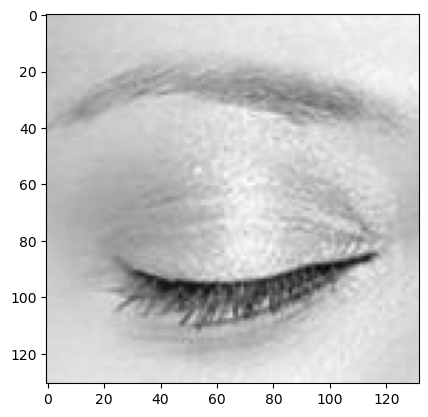

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(131, 132)

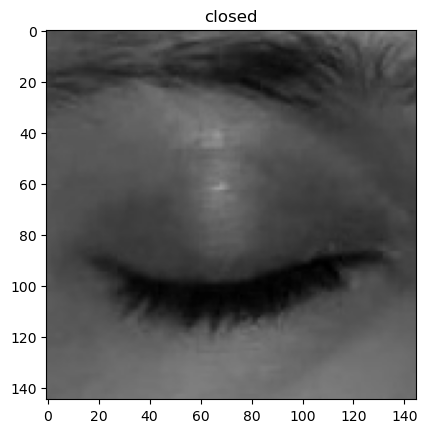

In [5]:
import cv2
import os
import matplotlib.pyplot as plt

datadirectory = "train"
classes = ["closed", "open"]
outer_break = False  # Flag to indicate when to break the outer loop

for category in classes:
    path = os.path.join(datadirectory, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Check if the image was loaded properly
        if img_array is None:
            print(f"Error loading image {img_path}")
            continue

        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(backtorgb)
        plt.title(category)
        plt.show()

        # Break after showing one image per category
        outer_break = True
        break  # Break the inner loop

    if outer_break:
        break  # Break the outer loop if the flag is set


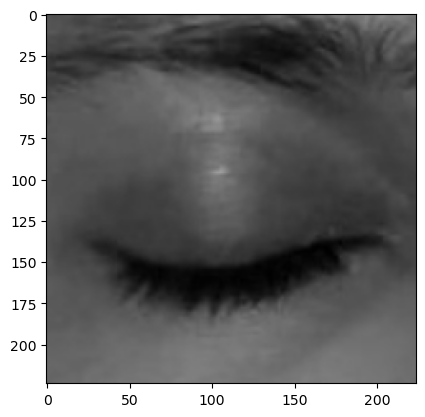

In [6]:
img_size=224
new_array=cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

# reading all the images and converting them into array for data and  labels

In [7]:
training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(datadirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            try:
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(f"Failed to process image {img_path}: {e}")
                pass


In [8]:
create_training_data()

In [9]:
print(len(training_data))

1452


In [10]:
import random

random.shuffle(training_data)


In [11]:
x=[]
y=[]

for features,label in training_data:
    x.append(features)
    y.append(label)
    
x=np.array(x).reshape(-1,img_size,img_size,3)    

In [12]:
x.shape

(1452, 224, 224, 3)

In [13]:
x=x/255.0;

In [14]:
y=np.array(y)

In [15]:
import pickle 
pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [16]:
pickle_in=open("x.pickle","rb")
x=pickle.load(pickle_in)
pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

# deep learning model for training -Training Learning

In [17]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [18]:
model=tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

# transfer learning

In [20]:
base_input=model.layers[0].input   ##input

In [21]:
base_output=model.layers[-4].output

In [22]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)   ##one node(1/0)
final_output=layers.Activation('sigmoid')(final_output)

In [23]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

# settings for binary classification(open/closed)

In [25]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [26]:
new_model.fit(x,y,epochs=1,validation_split=0.1)

41/41 [==============================] - 544s 13s/step - loss: 0.1452 - accuracy: 0.9387 - val_loss: 0.1182 - val_accuracy: 0.9863


In [27]:
new_model.save('my_drowsymodel.h5')

In [28]:
new_model=tf.keras.models.load_model('my_drowsymodel.h5')

# checking the network for predictions

In [29]:
img_array=cv2.imread(r"C:\Users\lavanya\Documents\drowsy 2\train\Open\_4.jpg",cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)    
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [30]:
x_input=np.array(new_array).reshape(1,img_size,img_size,3)

In [31]:
x_input.shape

(1, 224, 224, 3)

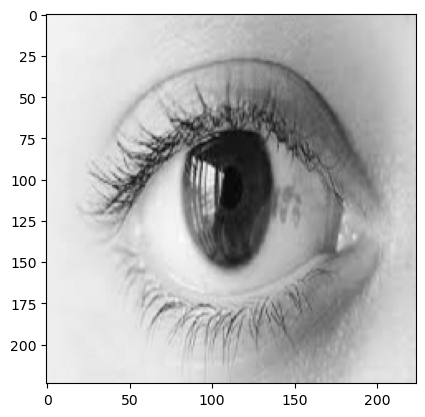

In [32]:
plt.imshow(new_array)

In [33]:
x_input=x_input/255.0

In [34]:
prediction=new_model.predict(x_input)

In [35]:
prediction

array([[1.]], dtype=float32)

# Lets check on unknown images

In [36]:
img=cv2.imread(r"C:\Users\lavanya\Documents\drowsy 2\train\face.jpg")

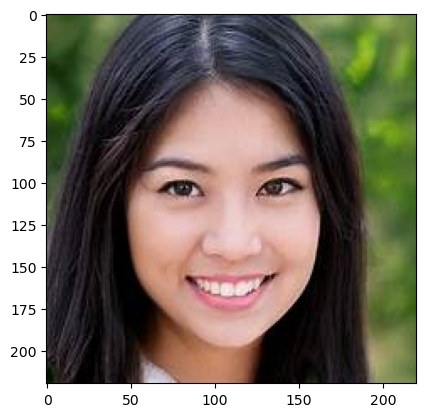

In [37]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [38]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [39]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [40]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [41]:
eyes=eye_cascade.detectMultiScale(gray,1.1,4)

In [42]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

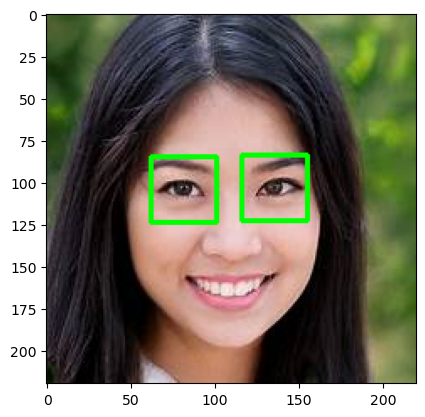

In [43]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# cropping the eye image

In [44]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
     #print(faceCascade.empty())
eyes=eye_cascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in eyes:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("eyes are not detected")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey:ey+eh,ex:ex+ew]

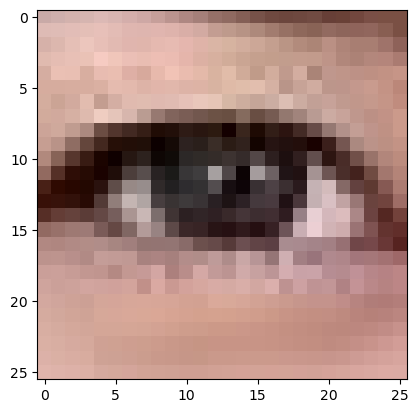

In [45]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [46]:
eyes_roi.shape

(26, 26, 3)

In [47]:
final_image=cv2.resize(eyes_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [48]:
final_image.shape

(1, 224, 224, 3)

In [49]:
new_model.predict(final_image)

array([[1.]], dtype=float32)

# real time video

# first detect that eyes are closed on open

In [70]:
import cv2
import numpy as np
path="haarcascade_frontalface_default.xml"
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
video_path = r"C:\Users\lavanya\Documents\drowsy 2\drowsy.mp4"
cap = cv2.VideoCapture(video_path)
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while  True:
    ret,frame=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
         #print(faceCascade.empty())
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in eyes:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("eyes are not detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi=roi_color[ey:ey+eh,ex:ex+ew]
    final_image=cv2.resize(eyes_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0   
    
    predictions=new_model.predict(final_image)
    
    if predictions[0][0] > 0.1:  # Adjust this threshold lower if necessary
        status = "open eyes"
    else:
        status = "closed eyes"
        
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame,
               status,
               (50,50),
               font,3,
               (0,0,255),
               2,
               cv2.LINE_4)
    cv2.imshow("video",frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
        
cap.release()    
cv2.destroyAllWindows()

False
False
False
False
False
False
False
False
eyes are not detected
eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
eyes are not detected
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
eyes are not detected
False
False
False
False
False
False
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not